<a href="https://colab.research.google.com/github/steed360/Data-Analysis/blob/main/Quantifying_Campaign_Uncertainty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
#import pymc3 as pm
import pandas as pd
import scipy.stats as stats
import seaborn as sns
#from scipy.interpolate import griddata


**Purpose of this Notebook**

Tool for predicting campaign effectiveness.  

A previous campaign contacted 1000 people and had a response rate of 5%. Repeating the campaign, how many responses can be expected?

Assuming an underlying Bernouilli variable (response rate) of 0.05 (5%), show different ways to apply this in predicting the expected number of responses to a new campaign. 

The 5 ways this can be done:

??) Assume no knowledge at all. Here we'll 

a)  Apply a fixed point (multiply the unseen sample by 0.05). So to find the expected response rate, simply  multiply the number of people to be contacted by 0.05. 

b)   Apply fixed points but acknowledge the uncertainty that 0.05 is the right point to use (on account of sampling distributions). Therefore select a 90% confidence interval.

c)  Instead of applying fixed points apply all of the **sampling distribution as fixed points**. Sample a lot of response ratepoints from the sampling distribution, sample a response probability from the sampling distribution. Because response rates closer to 0.05 are more plausible, they will be selected more often. Hence, 

d)  As 




In [7]:
Original_Campaign_Size = 1000 # sample size

In [120]:
New_Campaign_Size = 1000

In [122]:
Original_Response_Rate  = 0.1  # NB: Assumption is IID Bernouilli variable

In [123]:
Original_Campaign_Responses = Original_Campaign_Size * Original_Response_Rate
Original_Campaign_Responses

100.0

**A) Apply fixed point statistic**

In [65]:
New_Campaign_Responses = New_Campaign_Size * Original_Response_Rate
New_Campaign_Responses

100.0

**B) Account for Sampling Error in the Original Distribution**

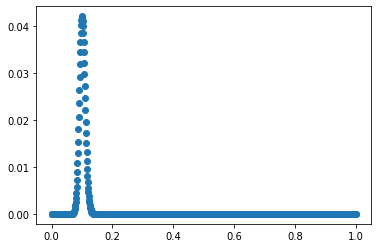

In [157]:
# Set up a list of underlying possible response_rates 
# The distribution plotted sums up to 1 and the height of the curve (0.1) 
# represents the most plausible value in the population.

grid_points = 1000
p_grid = np.linspace ( 0, 1, grid_points )
prior  = np.repeat ( 5, grid_points )  # this is a completley uniformative prior that will get washed away
ustd_posterior = stats.binom.pmf ( k=New_Campaign_Responses, n=Original_Campaign_Size, p= p_grid ) * prior
posterior = ustd_posterior / ustd_posterior.sum()
plt.plot (p_grid, posterior, 'o')

b_i Calculate The Confidence Intervals : The Bayesian Way

[0.0830083  0.12021202]


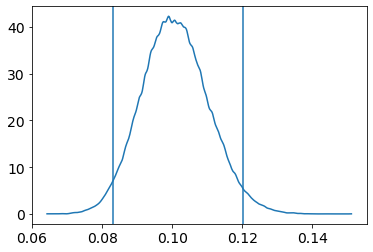

In [141]:
# Calculate the 90% confidence interval. 
# Firstly do it the Bayesian Analysis way.

# Get 1000 samples from the above distribution
samples = np.random.choice(p_grid, p=posterior, size=int(1e5), replace=True)

# If you have samples the confidence intervals are just percentiles.
lstCI = np.percentile (samples, [2.5,97.5])

print (  lstCI)
az.plot_kde ( samples)
plt.axvline (lstCI[0] )
plt.axvline (lstCI[1] )

# The figures below are the upper and lower bounds that the population response_rate could be (if IID)
# The interval is also shown on the chart.
# The chart is a simulation from the sampling distribution. You could use this in a violin plot as well of course.

b_ii Calculate the Confidence Intervals : The Frequentist Way

In [142]:
# TODO
# stats.binom.pmf ( k=New_Campaign_Responses, n=Original_Campaign_Size, p= 0.1 )

0.04201679086108606

b_iii Apply the values at the lower and upper confidence interval bounds to the future campaign

In [143]:
# This is the expected (95%) confidence range.
print ( New_Campaign_Size * lstCI [0] ) 
print ( New_Campaign_Size * lstCI [1] ) 

83.00830083008302
120.21202120212021


C) Now assume that the we know the response rate is a single value (10%).   
The number of people who will response is a matter of probability.
There is a small chance that none people will respond and a small(er) chance that all will.

This is effectively the same as the CI approach above, so disregard it.

[ 82. 119.]
[0.082, 0.119]


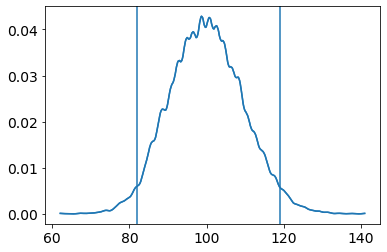

In [204]:
# A good way to deal with this problem is to simulate from the distribution.
# Get 1000 samples from the above distribution
# Note: this has already been done in b.

number_of_simulations=10000
trials = 1000  # number of people to contract, expected responses is 0.1 * 1000 = 100
samples = stats.binom.rvs(n= trials, p=0.1, size= number_of_simulations )
#print(samples)
az.plot_kde (samples)

# If you have samples the confidence intervals are just percentiles.
lstCI = np.percentile (samples, [2.5,97.5])

print (  lstCI)
az.plot_kde ( samples)
plt.axvline (lstCI[0] )
plt.axvline (lstCI[1] )

print ( [ lstCI[0] / trials, lstCI[1]/ trials ])

D) Sample probabilities from the posterior and then simulate from that to create a predictive posterior and then simulate from  that.

[ 76. 128.]
[0.076, 0.128]


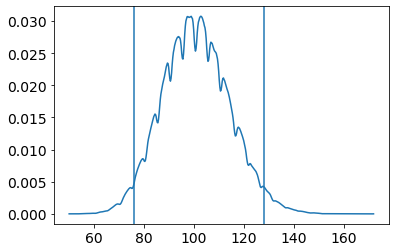

In [236]:
# We have already calculated the posterior and have the grid points:
#grid_points
#posterior

probs = np.random.choice(p_grid, p=posterior, size=int(1e5), replace=True)

# previous code
#samples = np.random.choice(p_grid, p=posterior, size=int(1e5), replace=True)

# New code
number_of_simulations=100000
campaign_size = 1000
samples = stats.binom.rvs(n=campaign_size, p= probs, size=number_of_simulations )

az.plot_kde ( samples)

# If you have samples the confidence intervals are just percentiles.
lstCI = np.percentile (samples, [2.5,97.5])

print (  lstCI)
plt.axvline (lstCI[0] )
plt.axvline (lstCI[1] )

# This is a broader distribution than before.
print ( [ lstCI[0] / trials, lstCI[1]/ trials ])


In [ ]:
# Now, 